<a href="https://colab.research.google.com/github/swidyarto/ACE-Digital/blob/main/SolutionQ3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 3

### Feed the following paragraph into your favourite data analytics tool, and answer the following;
'''
As a term, data analytics predominantly refers to an assortment of applications, from basic 
business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of 
advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella 
term for approaches to analyzing data -- with the difference that the latter is oriented to 
business uses, while data analytics has a broader focus. The expansive view of the term isn't 
universal, though: In some cases, people use data analytics specifically to mean advanced 
analytics, treating BI as a separate category. Data analytics initiatives can help businesses 
increase revenues, improve operational efficiency, optimize marketing campaigns and customer 
service efforts, respond more quickly to emerging market trends and gain a competitive edge 
over rivals -- all with the ultimate goal of boosting business performance. Depending on the 
particular application, the data that's analyzed can consist of either historical records or new 
information that has been processed for real-time analytics uses. In addition, it can come from a 
mix of internal systems and external data sources. At a high level, data analytics methodologies 
include exploratory data analysis (EDA), which aims to find patterns and relationships in data, 
and confirmatory data analysis (CDA), which applies statistical techniques to determine whether 
hypotheses about a data set are true or false. EDA is often compared to detective work, while 
CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by 
statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also 
be separated into quantitative data analysis and qualitative data analysis. The former involves 
analysis of numerical data with quantifiable variables that can be compared or measured 
statistically. The qualitative approach is more interpretive -- it focuses on understanding the 
content of non-numerical data like text, images, audio and video, including common phrases, 
themes and points of view.
'''

- a. What is the probability of the word “data” occurring in each line ?
- b. What is the distribution of distinct word counts across all the lines ?
- c. What is the probability of the word “analytics” occurring after the word “data” ?


### Question **3.a** and **3.c** are almost similar but **3.c** bigrams must be applied.
## a. What is the probability of the word “data” occurring in each line ?
- 1. investigate how many the word "data".
- 2. check the number of lines
- 3. find the number of times the word "data" appears in the text.
- 4. calculate the probability

In [ ]:
# Start with importing libraries
import re
from collections import Counter
import pandas as pd
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [ ]:
given_string = """As a term, data analytics predominantly refers to an assortment of applications, from basic \nbusiness intelligence (BI), reporting and online analytical processing (OLAP) to various forms of \nadvanced analytics. In that sense, it's similar in nature to business analytics, another umbrella \nterm for approaches to analyzing data -- with the difference that the latter is oriented to \nbusiness uses, while data analytics has a broader focus. The expansive view of the term isn't \nuniversal, though: In some cases, people use data analytics specifically to mean advanced \nanalytics, treating BI as a separate category. Data analytics initiatives can help businesses \nincrease revenues, improve operational efficiency, optimize marketing campaigns and customer \nservice efforts, respond more quickly to emerging market trends and gain a competitive edge \nover rivals -- all with the ultimate goal of boosting business performance. Depending on the \nparticular application, the data that's analyzed can consist of either historical records or new \ninformation that has been processed for real-time analytics uses. In addition, it can come from a \nmix of internal systems and external data sources. At a high level, data analytics methodologies \ninclude exploratory data analysis (EDA), which aims to find patterns and relationships in data, \nand confirmatory data analysis (CDA), which applies statistical techniques to determine whether \nhypotheses about a data set are true or false. EDA is often compared to detective work, while \nCDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by \nstatistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also \nbe separated into quantitative data analysis and qualitative data analysis. The former involves \nanalysis of numerical data with quantifiable variables that can be compared or measured \nstatistically. The qualitative approach is more interpretive -- it focuses on understanding the \ncontent of non-numerical data like text, images, audio and video, including common phrases, \nthemes and points of view."""
print(given_string)

As a term, data analytics predominantly refers to an assortment of applications, from basic 
business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of 
advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella 
term for approaches to analyzing data -- with the difference that the latter is oriented to 
business uses, while data analytics has a broader focus. The expansive view of the term isn't 
universal, though: In some cases, people use data analytics specifically to mean advanced 
analytics, treating BI as a separate category. Data analytics initiatives can help businesses 
increase revenues, improve operational efficiency, optimize marketing campaigns and customer 
service efforts, respond more quickly to emerging market trends and gain a competitive edge 
over rivals -- all with the ultimate goal of boosting business performance. Depending on the 
particular application, the data that's analyzed can c

In [ ]:
given_string = given_string.lower()

In [ ]:
line_list = given_string.splitlines()

In [ ]:
nlines = len(line_list)
nlines

23

In [ ]:
def tokenize(string):
    return re.compile('\w+').findall(string)

def word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)           # count the words
    d = Counter(''.join(text))  # count all letters
    return (dict(c))    # return a tuple of counted words and letters

def return_word_freq(string): 
    text = tokenize(string.lower())
    c = Counter(text)           # count the words
    d = Counter(''.join(text))  # count all letters
    return (dict(c), dict(d))    # return a tuple of counted words and letters

words = word_freq(given_string) # count and get dicts with counts
words_, letters = return_word_freq(given_string)

sumWords = sum(words.values())       # sum total words
sumLetters = sum(letters.values())   # sum total letters



In [ ]:
len(words)

194

In [ ]:
{k:v for (k,v) in words.items() if v>8 }

{'a': 10, 'analytics': 10, 'and': 9, 'data': 18, 'of': 10, 'the': 11, 'to': 11}

In [ ]:
# The probability of an event A is the number of ways event A can occur divided by the total number of possible outcomes.
data_count = words['data']
analytics_count = words['analytics']

In [ ]:
probablity_of_data_appearing_in_every_line = data_count/nlines

In [ ]:
probablity_of_data_appearing_in_every_line

0.782608695652174

In [ ]:
# GOT IT ! 0.78 it is......

In [ ]:
probablity_of_data_appearing_in_full_text = data_count/sumWords

In [ ]:
probablity_of_data_appearing_in_full_text

0.05625

## B. Now figure out this -> What is the distribution of distinct word counts across all the lines ?
- 1. We shall first figure out the distinct word counts in every line,
- 2. Create a histogram, bar plot or something similar to see the distribution.

In [ ]:
line_unique_counts = []
for line in line_list:
    line_unique_counts.append(len(word_freq(line)))

In [ ]:
line_unique_counts

[14,
 13,
 13,
 13,
 16,
 13,
 12,
 10,
 14,
 13,
 15,
 17,
 14,
 13,
 12,
 17,
 18,
 14,
 11,
 13,
 11,
 14,
 5]

In [ ]:
df_unique_words = pd.DataFrame(line_unique_counts)

In [ ]:
df_unique_words.rename(columns={0: "Unique_Words"})

,Unique_Words
0,14
1,13
2,13
3,13
4,16
5,13
6,12
7,10
8,14
9,13


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


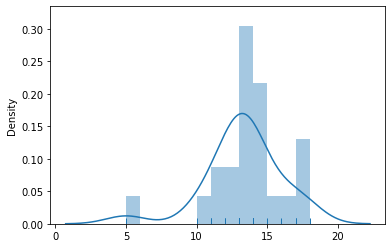

In [ ]:
sns.distplot(df_unique_words, kde=True, rug=True);

In [ ]:
# NORMALLY DISTRIBUTED - to an extent.

## C. Finally time to figure out this -> What is the probability of the word “analytics” occurring after the word “data” ?
- 1. draw the bigrams,
- 2. determine their counts
- 3. find "data analytics" and only "analytics" counts
- 4. calculate the probability.

In [ ]:
# import nltk 
# import re 
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 
# import pandas as pd 

# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(line_list)  
features = (vectorizer.get_feature_names()) 
# print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
# You can still get n-grams here 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(line_list) 
scores = (X2.toarray()) 
# print("\n\nScores : \n", scores) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", words.head(7)) 



Words : 
                  term      rank
80     data analytics  1.121468
79      data analysis  1.074633
100  exploratory data  0.509671
159    numerical data  0.507052
235        themes and  0.500000
32         and points  0.500000
186         points of  0.500000


In [ ]:
#The probability of an event A is the number of ways event A can occur divided by the total number of possible outcomes.
import re
from collections import Counter
bigramwords = re.findall('\w+', given_string)
bigram_counts = Counter(zip(bigramwords,bigramwords[1:]))
data_analytics_count = bigram_counts[("data", "analytics")]
print(f"Number of times data analytics appear together: {data_analytics_count}")
print(f"Number of times only analytics appear in complete text: {analytics_count}")

Number of times data analytics appear together: 6
Number of times only analytics appear in complete text: 10


In [ ]:
print(f"Probablity of analytics appearing after data: {data_analytics_count/analytics_count}")

Probablity of analytics appearing after data: 0.6
